## 1. A research laboratory was developing a new compound for the relief of severe cases of hay fever. In an experiment with 36 volunteers, the amounts of the two active ingredients (A & B) in the compound were varied at three levels each. Randomization was used in assigning four volunteers to each of the nine treatments. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm
%matplotlib inline

D:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
fever = pd.read_csv('Fever.csv')

In [3]:
fever.head()

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


In [4]:
fever.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [5]:
fever['A'].value_counts()

3    12
2    12
1    12
Name: A, dtype: int64

In [6]:
fever['B'].value_counts()

3    12
2    12
1    12
Name: B, dtype: int64

In [7]:
fever.isna().sum()

A            0
B            0
Volunteer    0
Relief       0
dtype: int64

In [8]:
fever['A'] = pd.Categorical(fever['A'])

In [9]:
fever['A'].value_counts

<bound method IndexOpsMixin.value_counts of 0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    2
13    2
14    2
15    2
16    2
17    2
18    2
19    2
20    2
21    2
22    2
23    2
24    3
25    3
26    3
27    3
28    3
29    3
30    3
31    3
32    3
33    3
34    3
35    3
Name: A, dtype: category
Categories (3, int64): [1, 2, 3]>

In [10]:
fever['B'] = pd.Categorical(fever['B'])

In [11]:
fever['B'].value_counts

<bound method IndexOpsMixin.value_counts of 0     1
1     1
2     1
3     1
4     2
5     2
6     2
7     2
8     3
9     3
10    3
11    3
12    1
13    1
14    1
15    1
16    2
17    2
18    2
19    2
20    3
21    3
22    3
23    3
24    1
25    1
26    1
27    1
28    2
29    2
30    2
31    2
32    3
33    3
34    3
35    3
Name: B, dtype: category
Categories (3, int64): [1, 2, 3]>

 1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually. [both statement and statistical form like Ho=mu, Ha>mu]

Formulating the Hypothesis for One-way ANOVA for the variable A :

Statement:

H0 =  the population means of all the three levels in the variable A are same  
H1 = the population mean of at least one level in the variable A is different

Statistical form:

H0 : µ1 = µ2 = µ3  
H1 : not all the means µ1, µ2, µ3 are equal

Formulating the Hypothesis for One-way ANOVA for the variable B :

Statement:

H0 =  the population means of all the three levels in the variable B are same  
H1 = the population mean of at least one level in the variable B is different

Statistical form:

H0 : µ1 = µ2 = µ3  
H1 : not all the means µ1, µ2, µ3 are equal

1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [12]:
print('STEP 1: One-Way Anova Hypothesis for Ingredient "A" : \n H0 : µ1 = µ2 = µ3 \n H1 : at least one pair of means are not equal  \n')
print('STEP 2: Consider the level of significanace (α) as 0.05 \n')
print('STEP 3: Using the F- test statistic in One-Way ANOVA. \n')
formula  = 'Relief ~ C(A)'
model = ols(formula,fever).fit()
anova_tab = anova_lm(model)
print(anova_tab)

STEP 1: One-Way Anova Hypothesis for Ingredient "A" : 
 H0 : µ1 = µ2 = µ3 
 H1 : at least one pair of means are not equal  

STEP 2: Consider the level of significanace (α) as 0.05 

STEP 3: Using the F- test statistic in One-Way ANOVA. 

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


In [13]:
formula  = 'Relief ~ A'#(wrong)
model = ols(formula,fever).fit()
anova_tab = anova_lm(model)
print(anova_tab)

            df  sum_sq     mean_sq          F        PR(>F)
A          2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


The p value is less than the level of significance, we can reject the Null Hypothesis.  
Hence, we have evidence that there is difference in the mean of three levels in Ingredient A and not all of the means are same .

1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [14]:
print('STEP 1: One-Way Anova Hypothesis for Ingredient "B" : \n H0 : µ1 = µ2 = µ3 \n H1 : at least one pair of means are not equal \n')
print('STEP 2: Consider the level of significanace (α) as 0.05 \n')
print('STEP 3: Using the F- test statistic in One-Way ANOVA. \n')
formula1  = 'Relief ~ C(B)'
model1 = ols(formula1,fever).fit()
anova_tab1 = anova_lm(model1)
print(anova_tab1)

STEP 1: One-Way Anova Hypothesis for Ingredient "B" : 
 H0 : µ1 = µ2 = µ3 
 H1 : at least one pair of means are not equal 

STEP 2: Consider the level of significanace (α) as 0.05 

STEP 3: Using the F- test statistic in One-Way ANOVA. 

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


In [15]:
formula1  = 'Relief ~ B'
model1 = ols(formula1,fever).fit()
anova_tab1 = anova_lm(model1,type=1)
print(anova_tab1)

            df  sum_sq    mean_sq         F   PR(>F)
B          2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


The p value is less than the level of significance, we can reject the Null Hypothesis.  
Hence, we have evidence that there is difference in the mean of three levels in the Ingredient B and not all of the means are same .

1.4) Analyse the effects of one variable on another with the help of an interaction plot.
What is the interaction between the two treatments?

<AxesSubplot:xlabel='A', ylabel='Relief'>

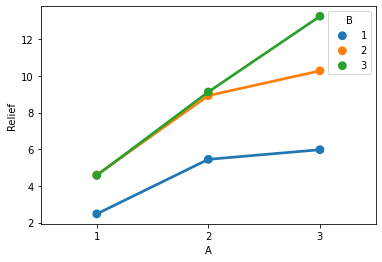

In [16]:
sns.pointplot(x='A', y='Relief', data=fever, hue='B', ci=None)

The point plot shows the interactions of the one categorical variables across different levels of another categorical variables.
From the above point plot, it is evident that both the Ingredient 'A' and Ingredient 'B' are interacting with each other across three different groups/levels, because the distance between the means across the three levels are not the same.
The group 1 of Ingredient A is very closely interacted with group 2 and group 3 of Ingredient B.  
The group 2 of Ingredient A is slightly interacting with group 2 and group 3 of Ingredient B.

<AxesSubplot:xlabel='A', ylabel='Relief'>

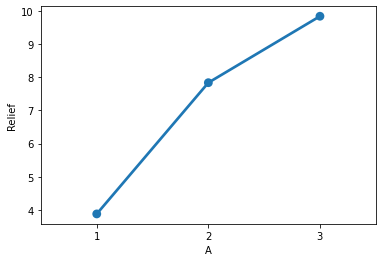

In [17]:
sns.pointplot(x='A', y='Relief', data=fever, ci=None)

<AxesSubplot:xlabel='B', ylabel='Relief'>

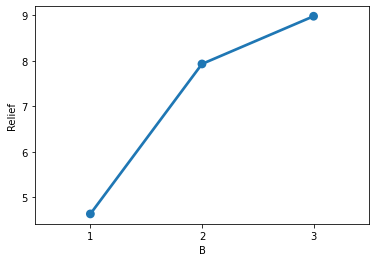

In [18]:
sns.pointplot(x='B', y='Relief', data=fever, ci=None)

<AxesSubplot:xlabel='B', ylabel='Relief'>

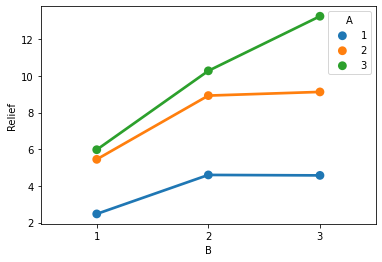

In [20]:
sns.pointplot(x='B', y='Relief', data=fever, hue='A', ci=None)

1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’ along with their interaction 'A*B') with the variable 'Relief' and state your results.

Step 1:

$H_0$ : The means of 'Relief' variable with respect to each Ingredient 'A' and 'B' is equal.

$H_1$ : At least one of the means of 'Relief' variable with respect to each Ingredient 'A' and 'B' is unequal.

Step 2:

Consider the level of significanace (α) as 0.05

Step 3:
Using the $ F- test statistic $ in Two-Way ANOVA .

In [21]:
print('STEP 1: Two-Way Anova Hypothesis for Ingredient A and Ingredient B with variable Relief.  \n')
print(' H0 : The means of Relief variable with respect to each Ingredient A and B is equal. \n ')
print(' H1 : At least one of the means of Relief variable with respect to each Ingredient A and B is unequal. \n')
print('STEP 2: Consider the level of significanace (α) as 0.05 \n')
print('STEP 3: Using the F- test statistic in Two-Way ANOVA. \n')
formula  = 'Relief ~ C(A) + C(B) + C(A):C(B)'
model = ols(formula,fever).fit()
anova_tab = anova_lm(model,type=2)
print(anova_tab)

STEP 1: Two-Way Anova Hypothesis for Ingredient A and Ingredient B with variable Relief.  

 H0 : The means of Relief variable with respect to each Ingredient A and B is equal. 
 
 H1 : At least one of the means of Relief variable with respect to each Ingredient A and B is unequal. 

STEP 2: Consider the level of significanace (α) as 0.05 

STEP 3: Using the F- test statistic in Two-Way ANOVA. 

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


In the Two-Way ANOVA with interaction effect, the p-value for the Ingredient A (P=1.514043e-29) which is significant(>0.05), the p-value Ingredient B (P=3.348751e-26) is also significant(>0.05).  
The interaction between the Ingredient A and Ingredient B (P=6.972083e-17) is less than the level of significance of 0.05.
Because the interaction effect between Ingredient A and Ingredient B is statistically significant, you cannot interpret the main effects without considering the interaction effect.
Hence, we can reject the Null Hypothesis, stating that there is significant interaction between the levels of Ingredient A and Ingredient B.

In [22]:
formula  = 'Relief ~ C(A) + C(B) + Volunteer + C(A):C(B)'
model = ols(formula,fever).fit()
anova_tab = anova_lm(model,type=2)
print(anova_tab)

             df      sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020000  110.010000  1760.400739  1.765119e-28
C(B)        2.0  123.660000   61.830000   989.415305  2.935240e-25
C(A):C(B)   4.0   29.425000    7.356250   117.716098  2.938033e-16
Volunteer   1.0    0.000222    0.000222     0.003556  9.529043e-01
Residual   26.0    1.624778    0.062491          NaN           NaN


In the Two-Way ANOVA with the randomized variable and interaction effect, the p-value of Ingredient A (P=1.765119e-28) is significant, the p-value of Ingredient B (P=2.935240e-25) and the interaction between Ingredient A and Ingredient B (P=2.938033e-16) is statistically significant. The p-value of the randomized variable Volunteer (P= 9.529043e-01) is not significant, i.e, the main effect and interaction effect are not affected by the random variable.
Hence, we can reject the Null Hypothesis in this case.

1.6) Mention the business implications of performing ANOVA for this particular case study.

In [23]:
tukey = pairwise_tukeyhsd(fever['Relief'], fever['A'])
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,3.95,0.001,1.7814,6.1186,True
1,3,5.95,0.001,3.7814,8.1186,True
2,3,2.0,0.0755,-0.1686,4.1686,False


In [24]:
tukey = pairwise_tukeyhsd(fever['Relief'], fever['B'])
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,3.3,0.0164,0.5374,6.0626,True
1,3,4.35,0.0014,1.5874,7.1126,True
2,3,1.05,0.6164,-1.7126,3.8126,False
